# Prediction Using Supervised Machine Learning

### Task 1 : The Sparks Foundation - Data Science and Business Analytics 

#### This is a simple linear regression model which involves a dataset of two variables, Hours and Score. Via this model we are goind to test that if we study for a certain hours say 9.25, how much marks will we obtain.

## Importing necessary packages for data cleaning, analyising, model training and building. 

In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv("http://bit.ly/w-data")

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Data Walk Through

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.isnull == True

False

The dataset contains zero null values.

## Checking for data distribution

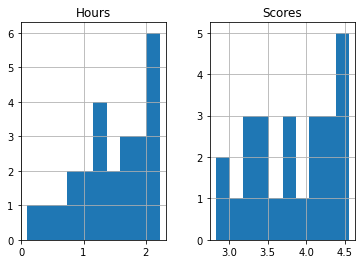

In [7]:
np.log(df).hist();

## Visualizing Data

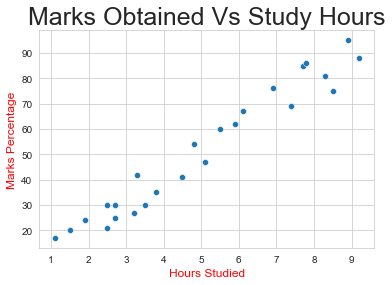

In [8]:
sns.set_style('whitegrid')
sns.scatterplot(y= df['Scores'], x= df['Hours'] )
plt.title('Marks Obtained Vs Study Hours',size=25)
plt.ylabel('Marks Percentage', size=12,color="Red")
plt.xlabel('Hours Studied', size=12,color="Red")
plt.show()

### The variable hour is linearly corelated to scores. Hence we can fit a straight line.

In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


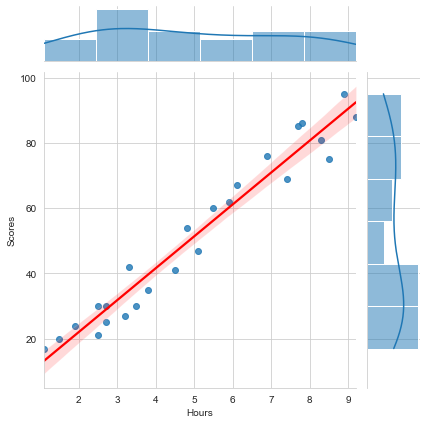

In [10]:
sns.jointplot(x=df['Hours'], y=df['Scores'], kind='reg', joint_kws = {'line_kws': {'color':'red'}});

### From the above visualization, we can draw a conclusion that the two variables are positively corelated and have a linear relationship.

# Model Training 

In [11]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression() 

regressor.fit(X_train.reshape(-1,1), y_train) 

LinearRegression()

In [13]:
line = regressor.coef_*X + regressor.intercept_

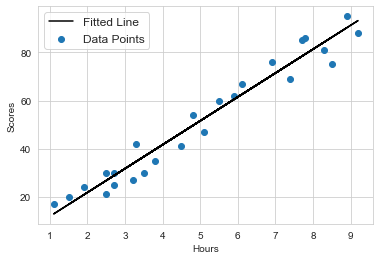

In [14]:
plt.scatter(X, y, label="Data Points")
plt.plot(X, line, label = 'Fitted Line', color= 'black')

plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend(fontsize = 12)
plt.grid(True)

In [15]:
predict_traindata = regressor.predict(X_train)
predict_testdata = regressor.predict(X_test)


## Comparing Actual and Predicted Values for better understanding.

In [16]:
df = pd.DataFrame({'Marks Obtaines': y_test, 'Marks Predicted': predict_testdata})    
df

,Marks Obtaines,Marks Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


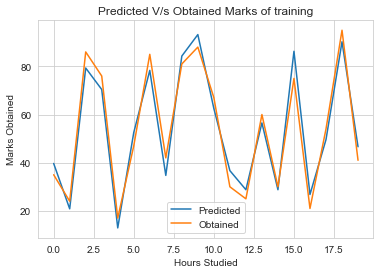

In [17]:
plt.plot((predict_traindata))
plt.plot(np.array((y_train)))
plt.title('Predicted V/s Obtained Marks of training')
plt.legend(['Predicted', 'Obtained'])
plt.xlabel('Hours Studied')
plt.ylabel('Marks Obtained')
plt.grid(True);

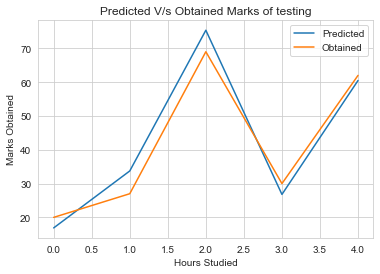

In [18]:
plt.plot((predict_testdata))
plt.plot(np.array((y_test)))
plt.title('Predicted V/s Obtained Marks of testing')
plt.legend(['Predicted', 'Obtained'])
plt.xlabel('Hours Studied')
plt.ylabel('Marks Obtained')
plt.grid(True);

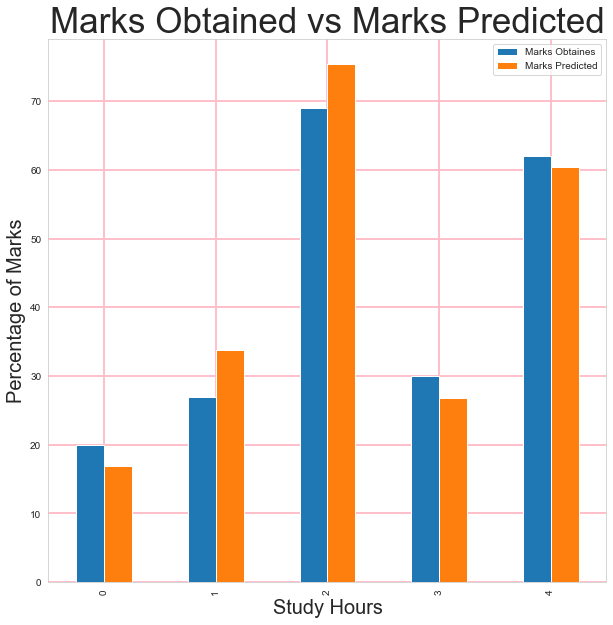

In [19]:

df.plot(kind = "bar", figsize = (10 , 10) )
plt.grid(which='major', color = "pink" , linewidth = 2)
plt.grid(which='minor',  linewidth = 2 )
plt.title('Marks Obtained vs Marks Predicted', size=35)
plt.ylabel('Percentage of Marks', size=20)
plt.xlabel('Study Hours', size=20)
plt.show()

## Estimating Training and Test Scores

In [20]:
print("Training Score:" ,regressor.score(x_train,y_train))
print("Test Score:" ,regressor.score(X_test, y_test))

NameError: name 'x_train' is not defined

In [ ]:
metric_dict = {"R2 Score": r2_score(y_test, predict_testdata),
              "MSE": mean_squared_error(y_test, predict_testdata),
              "RMSE": mean_squared_error(y_test,predict_testdata, squared = False),
              "MAE": mean_absolute_error(y_test, predict_testdata)}

In [ ]:
pd.DataFrame(metric_dict.values(), index = metric_dict.keys(), columns = ["Metric Values"])

In [ ]:
test_hour = float(input("Enter the number of hours you have invested in studying: \n"))
Output_Predicted = regressor.predict([[test_hour]])


In [ ]:
print( "Scores obtained after studying for {} hours is {}% ". format(test_hour, Output_Predicted))
